# [Exercise 0](https://colab.research.google.com/github/kokchun/Maskininlarning-AI21/blob/main/Exercises/E00_linear_regression.ipynb#scrollTo=XaaBo62vK1Bp)

In [38]:
import matplotlib.pyplot as pyplot
import numpy
import pandas
import seaborn

## 0

### a)

In [39]:
numpy.random.seed(42)
x_minutes_per_month = numpy.abs(numpy.random.normal(loc=100, scale=100, size=(400)))
x_minutes_per_month[:5]

array([149.6714153 ,  86.17356988, 164.76885381, 252.30298564,
        76.58466253])

In [40]:
randomized_error = numpy.random.normal(loc=0, scale=50, size=(400))
randomized_error[:5]

array([-79.72138294, -29.96875115,   0.26218499,   2.34902969,
       -22.50327357])

In [41]:
y_sek_per_month = 2 * x_minutes_per_month + 25 + randomized_error

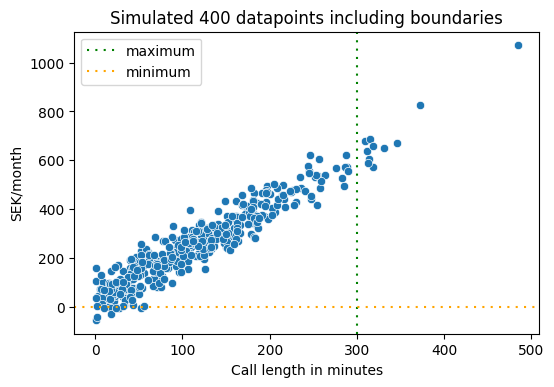

In [42]:
fig, ax = pyplot.subplots(dpi=100)
seaborn.scatterplot(x=x_minutes_per_month, y=y_sek_per_month)
ax.set(
    title="Simulated 400 datapoints including boundaries",
    xlabel="Call length in minutes",
    ylabel="SEK/month",
)
ax.axvline(300, dashes=(1, 3), color="green", label="maximum")
ax.axhline(0, dashes=(1, 3), color="orange", label="minimum")
ax.legend()

### b)

In [43]:
# remove over 300 min
# remove costs that are negative
clean_statement = (0 <= y_sek_per_month) & (x_minutes_per_month <= 300)
x_minutes_per_month_cleaned = x_minutes_per_month[clean_statement]
y_sek_per_month_cleaned = y_sek_per_month[clean_statement]
len(x_minutes_per_month_cleaned), len(y_sek_per_month_cleaned), len(x_minutes_per_month), len(y_sek_per_month)

(381, 381, 400, 400)

In [44]:
y_sek_per_month_ground_truth = 2 * x_minutes_per_month + 25

(0.0, 300.0)

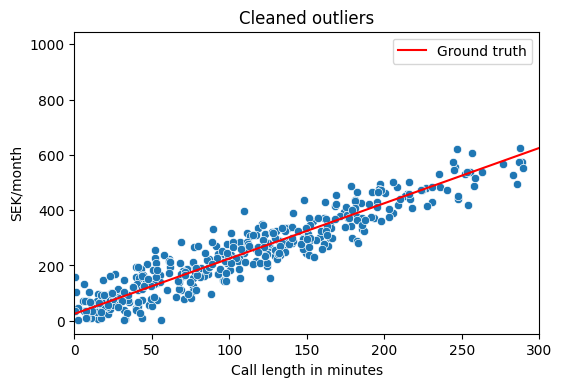

In [45]:
fig, ax = pyplot.subplots(dpi=100)
seaborn.scatterplot(x=x_minutes_per_month_cleaned, y=y_sek_per_month_cleaned)
seaborn.lineplot(x=x_minutes_per_month, y=y_sek_per_month_ground_truth, color='red', label='Ground truth')
ax.set(
    title="Cleaned outliers",
    xlabel="Call length in minutes",
    ylabel="SEK/month",
)
ax.legend()
pyplot.xlim(0,300)

### c)

In [46]:
y_sek_per_month_cleaned.shape, x_minutes_per_month_cleaned.shape

((381,), (381,))

In [47]:
phone_data_month = pandas.DataFrame({'Minutes':x_minutes_per_month_cleaned, 'Cost':y_sek_per_month_cleaned})
phone_data_month.head()

,Minutes,Cost
0,149.671415,244.621448
1,86.173570,167.378389
2,164.768854,354.799893
3,252.302986,531.955001
4,76.584663,155.666051


## 1

### a) b)

In [48]:
def train_test_split(
    X: pandas.DataFrame,
    y: pandas.DataFrame,
    train_fraction: float = 0.7,
    random_state: int = 42,
    replace=False,
):
    def sample(df: pandas.DataFrame):
        return df.sample(n=int(len(df) * train_fraction), random_state=random_state, replace=replace)

    def select_not_in_list(original: pandas.DataFrame, filtering_data_frame: pandas.DataFrame):
        return original.drop(filtering_data_frame.index)

    X_train, y_train = (sample(X), sample(y))

    X_test, y_test = (select_not_in_list(X, X_train), select_not_in_list(y, y_train))

    return {
        "train_data": {"X": pandas.DataFrame(X_train), "y": y_train},
        "test_data": {"X": pandas.DataFrame(X_test), "y": y_test},
    }


phone_data_month_train_test_split = train_test_split(
    X=(phone_data_month["Minutes"]),
    y=(phone_data_month["Cost"]),
)
train_data = phone_data_month_train_test_split["train_data"]
test_data = phone_data_month_train_test_split["test_data"]


train_data["X"].shape, train_data["y"].shape, test_data["X"].shape, test_data["y"].shape

((266, 1), (266,), (115, 1), (115,))

## 2

In [49]:
train_data['X']

,Minutes
266,39.978312
192,11.614256
46,53.936123
55,193.128012
57,69.078762
...,...
41,117.136828
294,227.766490
206,213.556564
254,74.743185


In [50]:
def simple_linear_regression(X: pandas.DataFrame, y: pandas.Series) -> pandas.Series:
    return numpy.linalg.pinv(X.T @ X) @ X.T @ y


def add_intercept_column(X: pandas.DataFrame) -> pandas.DataFrame:
    X_with_intercept = X.assign(intercept=1)
    X_with_intercept_column_names = list(X_with_intercept.columns)
    return X_with_intercept[X_with_intercept_column_names[-1:] + X_with_intercept_column_names[:-1]]


def predict(X, weights):
    return X @ weights

add_intercept_column(train_data["X"])

,intercept,Minutes
266,1,39.978312
192,1,11.614256
46,1,53.936123
55,1,193.128012
57,1,69.078762
...,...,...
41,1,117.136828
294,1,227.766490
206,1,213.556564
254,1,74.743185


In [51]:
weights = simple_linear_regression(add_intercept_column(train_data["X"]), train_data["y"]) # beta_hat
weights

0    32.221477
1     1.910506
dtype: float64

In [52]:
train_data["X"].shape, weights.shape

((266, 1), (2,))

In [53]:
add_intercept_column(train_data["X"]).shape, weights.shape

((266, 2), (2,))

In [54]:
train_regression_line = predict(add_intercept_column(train_data["X"]).to_numpy(), weights)

In [55]:
weights # two rows

0    32.221477
1     1.910506
dtype: float64

In [56]:
add_intercept_column(train_data["X"]) # two columns

,intercept,Minutes
266,1,39.978312
192,1,11.614256
46,1,53.936123
55,1,193.128012
57,1,69.078762
...,...,...
41,1,117.136828
294,1,227.766490
206,1,213.556564
254,1,74.743185


In [57]:
train_regression_line.shape

(266,)

<AxesSubplot:title={'center':'Regression line calculated using normal equation on training data'}, xlabel='Call length in minutes', ylabel='SEK/month'>

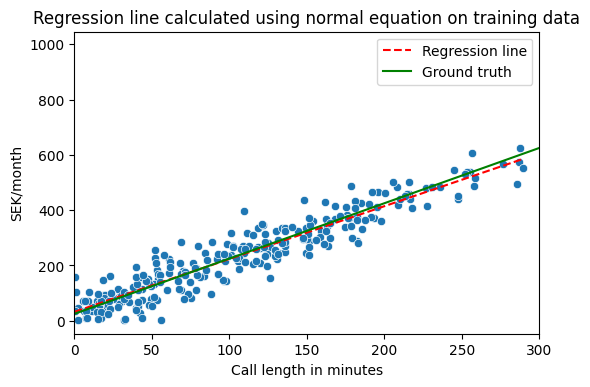

In [58]:
def data_scatter_and_regression_line_plot(
    data: tuple,
    regression_line: pandas.Series,
    regression_line_name="Regression line",
    title="Set title",
    xlabel="Set x label",
    ylabel="Set ylabel",
):
    fig, ax = pyplot.subplots(dpi=100)
    seaborn.scatterplot(x=data[0], y=data[1])
    seaborn.lineplot(
        x=data[0],
        y=regression_line,
        color="red",
        label=regression_line_name,
    )
    ax.lines[0].set_linestyle("--")
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
    ax.legend()
    pyplot.xlim(0, 300)


data_scatter_and_regression_line_plot(
    (train_data["X"]["Minutes"], train_data["y"]),
    train_regression_line,
    title="Regression line calculated using normal equation on training data",
    xlabel="Call length in minutes",
    ylabel="SEK/month",
)
seaborn.lineplot(
    x=x_minutes_per_month,
    y=y_sek_per_month_ground_truth,
    color="green",
    label="Ground truth",
)

## 3

### a)

<AxesSubplot:title={'center':'Regression line calculated using normal equation on test data'}, xlabel='Call length in minutes', ylabel='SEK/month'>

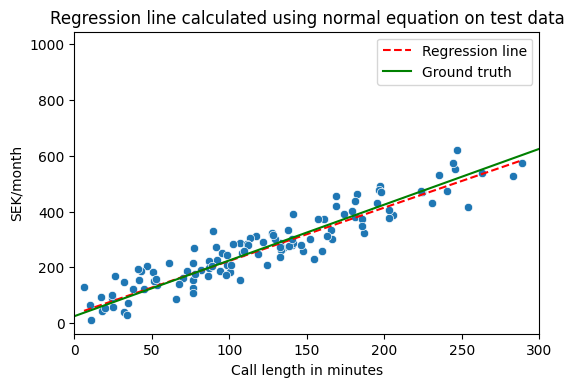

In [59]:
test_regression_line = predict(add_intercept_column(test_data["X"]).to_numpy(), weights)

data_scatter_and_regression_line_plot(
    (test_data["X"]["Minutes"], test_data["y"]),
    test_regression_line,
    title="Regression line calculated using normal equation on test data",
    xlabel="Call length in minutes",
    ylabel="SEK/month",
)
seaborn.lineplot(
    x=x_minutes_per_month,
    y=y_sek_per_month_ground_truth,
    color="green",
    label="Ground truth",
)

In [60]:
def calculate_MAE(regression_line, y_test_data):
    return 1 / len(y_test_data) * numpy.sum(numpy.abs(regression_line - y_test_data))

def calculate_MSE(regression_line, y_test_data):
    return 1 / len(y_test_data) * numpy.sum(numpy.power(y_test_data - regression_line, 2))

def calculate_RMSE(regression_line, y_test_data):
    return numpy.sqrt(1 / len(y_test_data) * numpy.sum(numpy.power(y_test_data - regression_line, 2)))

calculate_MAE(test_regression_line, test_data['y']), calculate_MSE(test_regression_line, test_data['y']), calculate_RMSE(test_regression_line, test_data['y'])

(40.12002651149252, 2401.5771288677697, 49.00588871623256)

## 4

### a)

In [72]:
sample_size = 10000

numpy.random.seed(42)

start_cost = 25
mean_cost_per_minute = numpy.abs(numpy.random.normal(loc=100, scale=100, size=sample_size))
mean_cost_per_sms = numpy.random.randint(low=0, high=50, size=sample_size)
mean_surf_cost = numpy.abs(numpy.random.normal(loc=0, scale=2, size=sample_size))
noise = numpy.random.normal(loc=0, scale=50, size=sample_size)

y_cost = 25 + 2*mean_cost_per_minute + 0.5*mean_cost_per_sms + 50*mean_surf_cost + noise

phone_data = pandas.DataFrame(
    {
        "Intercept": 1,
        "Minutes": mean_cost_per_minute,
        "SMS": mean_cost_per_sms,
        "Surf (GB)": mean_surf_cost,
        "Cost": y_cost,
    }
)

phone_data.tail()

,Intercept,Minutes,SMS,Surf (GB),Cost
9995,1,230.110206,36,0.611639,473.661741
9996,1,99.834497,18,1.328020,298.342321
9997,1,29.468328,19,2.811456,252.973057
9998,1,149.576557,31,3.439294,536.176482
9999,1,164.438845,43,1.406414,406.673658


### b)

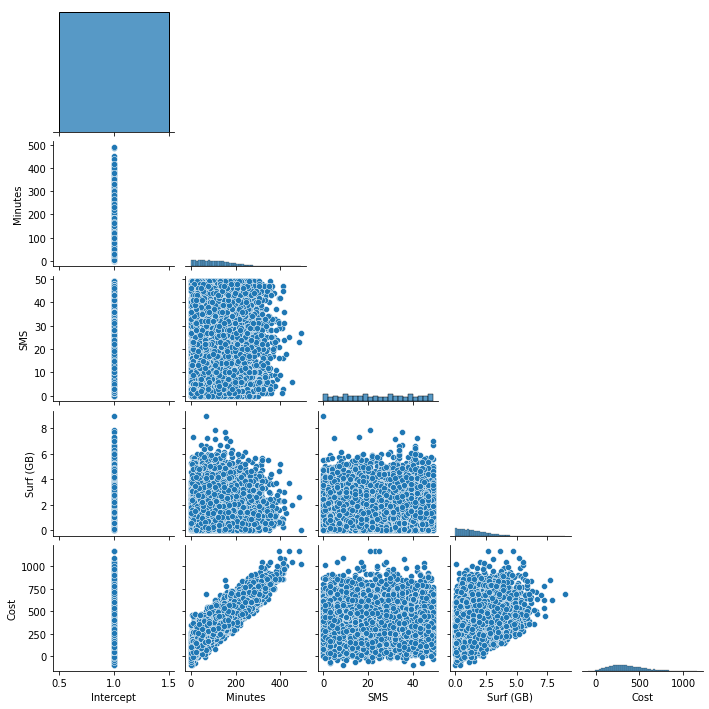

In [73]:
seaborn.pairplot(phone_data, corner=True, height=2)

<AxesSubplot:xlabel='Minutes', ylabel='Cost'>

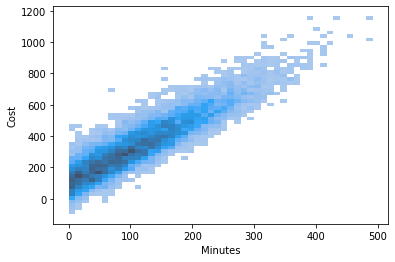

In [87]:
seaborn.histplot(x=phone_data['Minutes'], y=phone_data['Cost'])

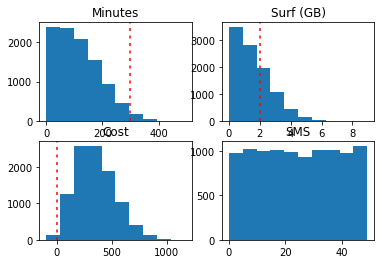

In [170]:
def plot_phone_data(phone_data):
    fig, ((plot1, plot2), (plot3, plot4)) = pyplot.subplots(2, 2)

    plot1.hist(x=phone_data["Minutes"])
    plot1.axvline(300, color="red", dashes=(2, 3))
    plot1.set_title("Minutes")

    plot2.hist(x=phone_data["Surf (GB)"])
    plot2.axvline(2, color="red", dashes=(2, 3))
    plot2.set_title("Surf (GB)")

    plot3.hist(x=phone_data["Cost"])
    plot3.axvline(0, color="red", dashes=(2, 3))
    plot3.set_title("Cost")

    plot4.hist(x=phone_data["SMS"])
    plot4.set_title("SMS")

    return fig.show()

plot_phone_data(phone_data)

### c) d)

In [165]:
phone_data_cleaned = phone_data.query('Minutes <= 300 & `Surf (GB)` <= 4 & Cost > 0')
phone_data_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Intercept,9320.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Minutes,9320.0,111.677377,72.973601,0.033132,50.877368,102.432565,163.481610,299.566749
SMS,9320.0,24.560086,14.528023,0.000000,12.000000,24.000000,37.000000,49.000000
Surf (GB),9320.0,1.450119,1.005766,0.000144,0.599454,1.296861,2.157416,3.998176
Cost,9320.0,333.269098,162.286888,1.265689,208.758924,317.365161,446.690556,899.281330


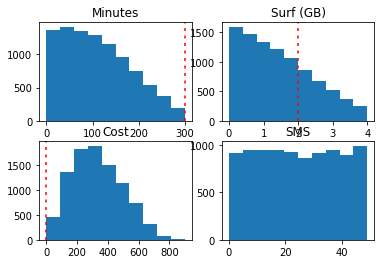

In [169]:
plot_phone_data(phone_data_cleaned)

## 5

### a)

In [189]:
feature_data = phone_data_cleaned[['Minutes', 'SMS', 'Surf (GB)']] # X_data
target_data = phone_data_cleaned['Cost']

phone_data_cleaned_train_test_split = train_test_split(feature_data, target_data, train_fraction=0.8)

phone_train_data, phone_test_data = phone_data_cleaned_train_test_split['train_data'],phone_data_cleaned_train_test_split['test_data']